# 房价预测

## 1. 了解特征

* MSSubClass：房子类别
* MSZoning：大致的分区类别
* LotFrontage：房子到街道的距离
* LotArea：房子面积
* Street：通向房子的道路类型
* Alley：通向房子的小径类型
* LotShape：房子形状
* LandContour：房子所在的地形平坦程度
* Utilities：拥有的公共设施
* LotConfig：房子所在地段
* LandSlope：房子的斜坡
* Neighborhood：房子所在的地理位置
* Condition1：房子接近主干道的程度
* Condition2：如果第二条主干道存在，房子和其的接近程度
* BldgType：房子户型
* HouseStyle：房子类型
* OverallQual：房子材料和完成质量等级
* OverallCond：房子条件的等级划分
* YearBuilt：房子建成的年份
* YearRemodAdd：房子重建的年份
* RoofStyle：房顶类型
* RoofMatl：房顶材质
* Exterior1st：房子外部覆盖材质
* Exterior2nd：房子第二种外部覆盖材质（如果存在第二种）
* MasVnrType：表层砌体类型
* MasVnrArea：表层砌体面积
* ExterQual：外部材料的质量
* ExterCond：目前外部材质的质量
* Foundation：地基类型
* BsmtQual：地下室高度
* BsmtCond：地下室的条件
* BsmtExposure：花园式地下室
* BsmtFinType1：地下室竣工面积质量
* BsmtFinSF1：Type 1 的完成面积
* BsmtFinType2： 第二个地下室竣工质量（如果存在）
* BsmtFinSF2：Type 2 的完成面积
* BsmtUnfSF：未竣工的地下室面积
* TotalBsmtSF：地下室的总面积
* Heating：供暖方式
* HeatingQC：供暖条件和质量
* CentralAir：是否有中央空调
* Electrical：电力系统
* 1stFlrSF/2stFlrSF：一层/二层面积
* LowQualFinSF：所有楼层的质量较低的竣工面积
* GrLivArea：居住面积
* BsmtFullBath/BsmtHalfBath：地下室是浴室/地下室是半个浴室
* FullBath/HalfBath：地面上的整个浴室/地面上的半个浴室
* Bedroom：地下室以上的卧室数量
* Kitchen：厨房数量
* KitchenQual：厨房质量
* TotRmsAbvGrd：总共的房间数量（不包括浴室）
* Functional：房子的功能
* Fireplaces：壁炉数量
* FireplaceQu：壁炉质量
* GarageType：停车库的类型
* GarageYrBlt：停车库建成年数
* GarageFinish：停车库装修程度
* GarageCars：停车库容纳车的数量
* GarageArea：停车库的面积
* GarageQual：停车库的质量
* GarageCond：停车库的条件
* PavedDrive：车道的铺设
* WoodDeckSF：木地板面积
* OpenPorchSF：开放的走廊面积
* EnclosedPorch：封闭的走廊面积
* 3SsnPorch：三季门廊的面积
* ScreenPorch：纱窗阳台的面积
* PoolArea：水池的面积
* PoolQC：水池的质量
* Fence：围墙质量
* MiscFeature：其他类别特征
* MiscVal：其他类别特征的价值
* MoSold：售卖的月份
* YrSold：售卖的年份
* SaleType：售卖形式
* SaleCondition：售卖条件

## 2. 查看源数据集

In [1]:
# 导入基本的模块
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# 读取训练集和测试集的数据
# 源数据有id列，所以读取的DataFrame不需要自动添加index
train_df = pd.read_csv('../input/train.csv', index_col=0)
test_df = pd.read_csv('../input/test.csv', index_col=0)

In [3]:
# 查看源数据,head()只显示前五行数据
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 3. 数据处理

### 3.1 分析SalePrice特征

In [4]:
# SalePrice的数据特征
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

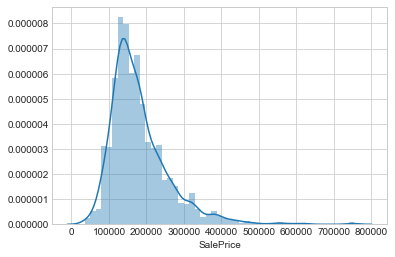

In [5]:
# 画图
# 设置主题风格
sns.set_style('whitegrid')
sns.distplot(train_df['SalePrice'])

可以看出图形不平滑，需要将其正态化，即通过处理使SalePrice趋向于正态分布。需要用到log1p,即log(SalePrice+1).

In [6]:
# 将train_df中的SalePrice正态化
sale_price = pd.DataFrame({'price': train_df['SalePrice'], 'log(price+1)': np.log1p(train_df['SalePrice'])})
sale_price.head()

,log(price+1),price
Id,,
1,12.247699,208500
2,12.109016,181500
3,12.317171,223500
4,11.849405,140000
5,12.429220,250000


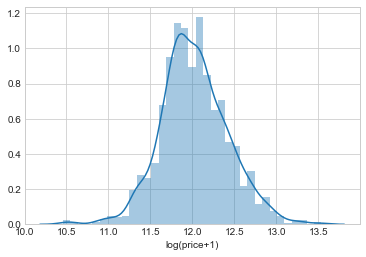

In [7]:
# 画log(price+1)的图像
sns.distplot(sale_price['log(price+1)'])

可以看到此时图像更接近正态分布，此时将log(price+1)当作需要预测的目标，当然在最后的预测中需要将结果用expm1()转换回来。

In [8]:
# 将train_df中的SalePrice列删除，使其和test_df的结构保持一致
y_train = np.log1p(train_df.pop('SalePrice'))

In [9]:
# 将test_df和train_df拼起来
all_df = pd.concat((train_df, test_df), axis=0)

# all_df的行数是train_df行数和test_df行数的和
print train_df.shape
print test_df.shape
print all_df.shape

(1460, 79)
(1459, 79)
(2919, 79)


### 3.2 特征提取和处理

#### 3.2.1 类别型数据进行One-Hot

1.在表中，有的数据是数值型的，有的是字符型的，有的是类别，有的是连续值等等，在进行分析的时候需要进行统一化。
2.对于类别型的特征，使用One-Hot编码，该编码又称为一位有有效编码，主要采用N个状态寄存器对N个状态进行编码，每个状态都有它独立的寄存器位，并且在任意时候只有一位有效，例如有以下三个特征：
* 性别：["male"，"female"]
* 地区：["Europe"，"US"，"Asia"]
* 浏览器：["Firefox"，"Chrome"，"Safari"，"Internet Explorer"]
按One-Hot编码的思想，male可以表示为[1, 0], female则是[0,1], US是[0, 1, 0]，Safari表示为[0, 0, 1, 0],如果有样本["male"，"US"，"Internet Explorer"]，则可以用One-Hot表示为[1, 0, 0, 1, 0, 0, 0, 0, 1]，这样导致的结果是一个数据会变得非常的稀疏。
3.pandas自带的get_dummies()可以做到一键One-Hot

In [10]:
# 查看MSSubClass类型
all_df['MSSubClass'].dtypes

dtype('int64')

MSSubClass是一个类别型特征，但是由于它使用数值型数据表示的，所以在One-Hot前需要将其字符化。

In [11]:
# 将数值型转换为字符型
all_df['MSSubClass'] = all_df['MSSubClass'].astype(str)

In [12]:
all_df['MSSubClass'].dtypes

dtype('O')

In [13]:
# 统计各个类别出现的次数
all_df['MSSubClass'].value_counts()

20     1079
60      575
50      287
120     182
30      139
70      128
160     128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

In [14]:
# 使用get_dummies()将MSSubClass进行One-Hot,使类别特征转换为数值特征
pd.get_dummies(all_df['MSSubClass'], prefix='MSSubClass').head() # prefix是给列名加前缀

,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90
Id,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [15]:
# 将所有的类别数据都进行One-Hot
all_dummy_df = pd.get_dummies(all_df)
all_dummy_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,0,0,1,0,0,0,0,1,0
2,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,0,0,0,1,0,0,0,0,1,0
3,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,0,0,1,0,0,0,0,1,0
4,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,0,0,0,1,1,0,0,0,0,0
5,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,0,0,0,1,0,0,0,0,1,0


#### 3.2.2 数值型特征的处理

In [16]:
# 查看哪些列有缺失值，每个特征缺失值有多少
all_dummy_df.isnull().sum().sort_values(ascending=False).head(10)

LotFrontage     486
GarageYrBlt     159
MasVnrArea       23
BsmtHalfBath      2
BsmtFullBath      2
BsmtFinSF2        1
GarageCars        1
TotalBsmtSF       1
BsmtUnfSF         1
GarageArea        1
dtype: int64

all_dummy_df有304列，所以会统计304列里每一列的缺失值，实际只有前十行有缺失值，所以这里只显示前十行。

In [17]:
# 用每列的均值填充相应列的缺失值
mean_cols = all_dummy_df.mean()
mean_cols.head(10)

LotFrontage        69.305795
LotArea         10168.114080
OverallQual         6.089072
OverallCond         5.564577
YearBuilt        1971.312778
YearRemodAdd     1984.264474
MasVnrArea        102.201312
BsmtFinSF1        441.423235
BsmtFinSF2         49.582248
BsmtUnfSF         560.772104
dtype: float64

In [18]:
all_dummy_df = all_dummy_df.fillna(mean_cols)

# 检查是否还有缺失值
all_dummy_df.isnull().sum().sum()

0L

#### 3.2.2 标准化数值型数据

如果使用regression分类器，最好将源数据放在一个标准分布内，不要让数据之间的差距太大。当然之前由类别数据转化为数值型数据的特征不需要进行标准化。

In [19]:
# 查看哪些数据是数值型的
numerical_cols = all_df.columns[all_df.dtypes != 'object']
numerical_cols

Index([u'LotFrontage', u'LotArea', u'OverallQual', u'OverallCond',
       u'YearBuilt', u'YearRemodAdd', u'MasVnrArea', u'BsmtFinSF1',
       u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF', u'1stFlrSF', u'2ndFlrSF',
       u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath', u'BsmtHalfBath',
       u'FullBath', u'HalfBath', u'BedroomAbvGr', u'KitchenAbvGr',
       u'TotRmsAbvGrd', u'Fireplaces', u'GarageYrBlt', u'GarageCars',
       u'GarageArea', u'WoodDeckSF', u'OpenPorchSF', u'EnclosedPorch',
       u'3SsnPorch', u'ScreenPorch', u'PoolArea', u'MiscVal', u'MoSold',
       u'YrSold'],
      dtype='object')

使用公式（x-x'）/s将数据进行标准化，其中x'为特征均值，s为特征标准差

In [20]:
# 数值型数据标准化
numerical_cols_mean = all_dummy_df.loc[:, numerical_cols].mean()
numerical_cols_std = all_dummy_df.loc[:, numerical_cols].std()
all_dummy_df.loc[:, numerical_cols] = (all_dummy_df.loc[:, numerical_cols] - numerical_cols_mean) / numerical_cols_std

## 4. 建模

### 4.1 将数据分为训练集和测试集

在第三步中，我们将训练集和测试集合并是为里一起将进行数据处理，建模时需要再将训练集和测试集分开来。

In [21]:
dummy_train_df = all_dummy_df.loc[train_df.index]
dummy_test_df = all_dummy_df.loc[test_df.index]

In [22]:
print dummy_train_df.shape
print dummy_test_df.shape

(1460, 303)
(1459, 303)


In [23]:
X_train = dummy_train_df.values
X_test = dummy_test_df.values

### 4.2 Ridge Regression 

岭回归，即带有L2正则化的线性最小二乘，通过放弃最小二乘法的无偏性，以损失部分信息、降低精度为代价获得回归系数更为符合实际、更可靠的回归方法，对病态数据的拟合要强于最小二乘法。

In [24]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

调参：alpha表示正则化强度，必须为float型，较大的值指定较强的正则化

In [48]:
# 使用交叉验证来测试模型
alphas = np.logspace(-3, 2, 50)
test_scores1 = []

for alpha in alphas:
    clf = Ridge(alpha) # 构建一个岭回归模型
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error')) # 10折交叉验证
    test_scores1.append(np.mean(test_score)) # test_scores中一共有50个参数下的score值

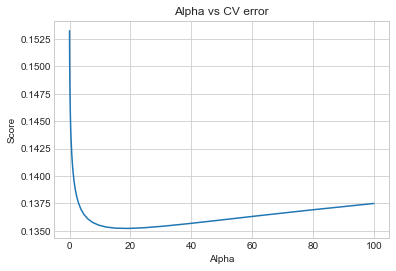

In [49]:
plt.plot(alphas, test_scores1)
plt.xlabel("Alpha")
plt.ylabel("Score")
plt.title('Alpha vs CV error')
plt.show()

可以看到，当alpha为10~20时，score最小接近0.1352

### 4.3 Random Forest

In [27]:
from sklearn.ensemble import RandomForestRegressor

调参：max_features表示单个决策树想要使用的最大特征数量，可以有 int, float, string or None, optional (default=”auto”)
* 如果是int型，则表示每个子树最多使用的特征数量
* 如果是float型，则表示使用的特征数目占总特征数目的百分比
* 如果是auto，则默认使用所有的特征来进行划分
* 如果是sqrt，则表示每个子树可以使用总特征数目的平方根个
* 如果是log2, 则表示每个子树可用特征个数是log2(总特征个数)
* 如果没写，则默认每个子树可用的特征是总特征

In [28]:
max_features = [.1, .3, .5, .7, .9, .99]
test_scores2 = []

for max_feature in max_features:
    clf = RandomForestRegressor(n_estimators=200, max_features=max_feature) # n_estimators表示建立的子树的数量
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores2.append(np.mean(test_score))

In [29]:
print test_scores2

[0.14003195792840933, 0.13665842065150147, 0.13634508792657576, 0.13767996034648561, 0.13866612931456676, 0.14006325602196829]


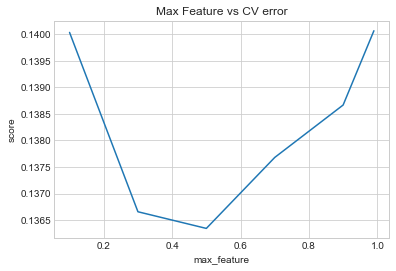

In [30]:
plt.plot(max_features, test_scores2)
plt.xlabel('max_feature')
plt.ylabel('score')
plt.title('Max Feature vs CV error')
plt.show()

可以看出，最优值在max_features为0.3的时候取得，最优值为0.1361

### 4.4 Bagging

Bagging把许多小分类器放在一起，每个小分类器随机训练一部分数据，然后把结果综合起来（多数投票制）

In [31]:
from sklearn.ensemble import BaggingRegressor

调参：base_estimator基本分类器，如果没有指定，则认为基本分类器是决策树，n_estimators指定基本分类器的数量

#### 4.4.1 基本分类器为决策树

In [50]:
params = [10, 15, 20, 25, 30, 40, 50, 60, 70, 100]
test_scores3 = []

for param in params:
    clf = BaggingRegressor(n_estimators=param)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores3.append(np.mean(test_score))

In [51]:
print test_scores3

[0.14852526176385009, 0.14755997395978621, 0.14665090373511108, 0.14284115043315998, 0.14189689071817618, 0.14379395932472447, 0.14276789524786476, 0.1425343382298406, 0.14016877494420613, 0.14159342366141089]


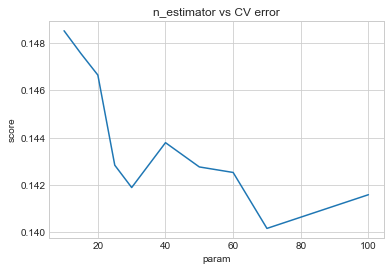

In [52]:
plt.plot(params, test_scores3)
plt.xlabel('param')
plt.ylabel('score')
plt.title('n_estimator vs CV error')
plt.show()

此时最好的结果接近0.14，并没有比单独用随机森林或者岭回归的结果要好

#### 4.4.2 基本分类器为Ridge

In [35]:
# 找出刚才Ridge模型中使score最优的alpha
alpha = alphas[test_scores1.index(min(test_scores1))]
print alpha

19.3069772888


In [36]:
# 构造弱分类器
ridge = Ridge(alpha=alpha)

In [37]:
params = [1, 10, 15, 20, 25, 30, 40]
test_scores4 = []

for param in params:
    clf = BaggingRegressor(base_estimator=ridge, n_estimators=param)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores4.append(np.mean(test_score))

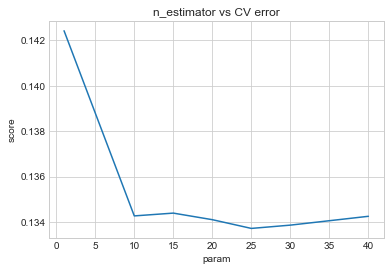

In [38]:
plt.plot(params, test_scores4)
plt.xlabel('param')
plt.ylabel('score')
plt.title('n_estimator vs CV error')
plt.show()

可以看到当使用30个小Ridge分类器集成的Bagging时，最优结果接近0.132，比Ridge的结果0.135有所提高

### 4.5 Boosting

#### 4.5.1 Adaboost

Adaboost是boosting中较为代表的算法，基本思想是通过训练数据的分布构造一个分类器，然后通过误差率求出这个弱分类器的权重，通过更新训练数据的分布，迭代进行，直到达到迭代次数或损失函数小于某一阈值。

In [40]:
from sklearn.ensemble import AdaBoostRegressor

调参：base_estimator表示基本分类器，默认为决策树模型，n_estimators表示最大的基本分类器的数量

In [41]:
# 基本分类器为默认的决策树
params = [10, 15, 20, 25, 30, 35, 40, 45, 50]
test_scores5 = []

for param in params:
    clf = AdaBoostRegressor(n_estimators=param)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores5.append(np.mean(test_score))

In [44]:
print test_scores5

[0.18386267238630585, 0.18135826841869745, 0.17657811565998222, 0.17949509349140746, 0.17723053340477096, 0.17581736459055602, 0.17361942742345676, 0.17654609014678929, 0.17529489649753685]


Text(0.5,1,u'n_estimator vs CV error')

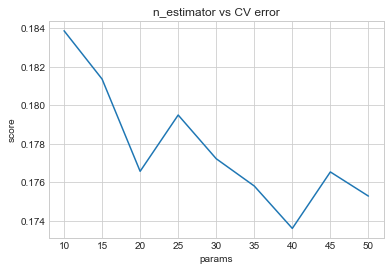

In [42]:
plt.plot(params, test_scores5)
plt.xlabel('params')
plt.ylabel('score')
plt.title('n_estimator vs CV error')

可以看到，此时最优值比只比0.174稍小，并没有优于前面的模型

In [61]:
# 基本分类器为Ridge
params = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
test_scores6 = []

for param in params:
    clf = AdaBoostRegressor(base_estimator=ridge, n_estimators=param)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores6.append(np.mean(test_score))

In [62]:
print test_scores6

[0.14204565349905304, 0.14503828026555815, 0.1536187841795072, 0.15807576819208002, 0.16046116035461083, 0.16272465964252031, 0.16725314698496205, 0.1658106488434099, 0.16099913606176569, 0.1656468094215163, 0.16592183335569644]


Text(0.5,1,u'n_estimator vs CV error')

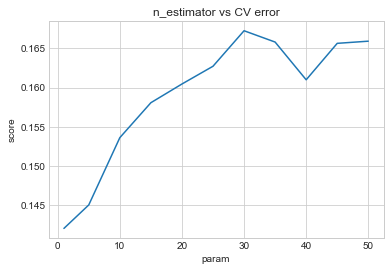

In [63]:
plt.plot(params, test_scores6)
plt.xlabel('param')
plt.ylabel('score')
plt.title('n_estimator vs CV error')

此时，最优score值也只是0.142，并美比前面的结果更优

#### 4.5.2 XGBoost

In [64]:
from xgboost import XGBRegressor

In [65]:
params = [1, 2, 3, 4, 5, 6]
test_scores7 = []

for param in params:
    clf = XGBRegressor(max_depth=param)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores7.append(np.mean(test_score))

Text(0.5,1,u'max_depth vs CV error')

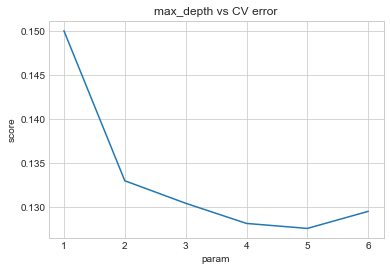

In [66]:
plt.plot(params, test_scores7)
plt.xlabel('param')
plt.ylabel('score')
plt.title('max_depth vs CV error')

可以看出，此时score值已经低于0.130了，是所有模型中最优的，所以用该模型来进行预测。并且此时的max_depth为5

## 结果预测

In [68]:
# 建立模型
xgb = XGBRegressor(max_depth=5)

In [70]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [71]:
y_predict = xgb.predict(X_test)

因为预测出来的结果是price求经过公式log(price+1)转化而来的，所以需要用expm1()函数将其转化成price

In [73]:
y_final = np.expm1(y_predict)

In [75]:
# 输出结果
submission_df = pd.DataFrame(data={'Id': test_df.index, 'SalePrice': y_final}) 
submission_df.head(10)

,Id,SalePrice
0,1461,122858.617188
1,1462,162398.265625
2,1463,189725.781250
3,1464,189369.859375
4,1465,189783.156250
5,1466,175549.265625
6,1467,175227.453125
7,1468,163846.906250
8,1469,185315.562500
9,1470,122427.617188


In [76]:
submission_df.to_csv('submission.csv', index=False)